## Homework with Iris Extended Dataset

This is the homework that you need to complete after the this semester to demonstrate that you have learned the basics of linear and logistic regression and machine learning in general.

Before you start, I would like to introduce basic knowledge of Markdown and Jupyter Notebook, as well as some basics of Python and visualization, such that you can complete the homework with ease.





## Preknowledge

### Markdown and Code in Jupyter Notebook
[If you have already know how to code in python, you can delete and skip this part.]

Jupyter Notebook is a web-based interactive computational environment for creating Jupyter notebooks documents. It is a tool that can be used for data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more. 

It has two types of cells: Markdown and Code. Markdown is a lightweight markup language with plain text formatting syntax. It is designed so that it can be converted to HTML and many other formats using a tool by the same name. Markdown is often used to format readme files, for writing messages in online discussion forums, and to create rich text using a plain text editor. For example, the following is a markdown cell:

```markdown
# This is a heading
## This is a subheading
How you can write an equation in markdown:
$y = x^2$
```

The above markdown cell will be rendered as:
# This is a heading
## This is a subheading
$y = x^2$

In the code cell, you can write python code and run it. For example, the following is a code cell:

```python
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
```


#### Python and Visualization

We use `pandas` to read csv files and do data analysis. We use `matplotlib` to plot figures. For example, the following code will read a csv file and plot a scatter plot.


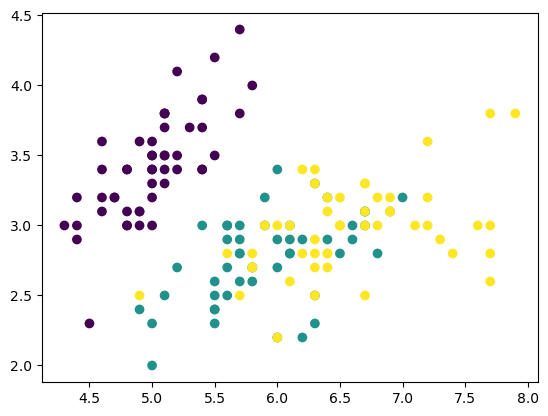

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target    # add a new column called target
# plot the data
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'])

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Data manipulation with pandas

Pandas provides a set of powerful tools for manipulating tabular data. It is a fast, efficient, and well-designed data analysis library. It is the most popular Python library for data analysis. It is built on top of NumPy and makes it easy to use in NumPy-centric applications. It is also a fundamental high-level building block for doing practical, real world data analysis in Python.

* Selection: `pd.query()` with logical filters (in strings)
* Add column: `.assign()`
* sorting: `.sort_values()`
* rename: `.rename()`
* group operation: `.groupby()`

Note: Pandas `.groupby()` will **<font color = 'red'>put grouped variables into multi-index</font>**, so the columns after grouping will not include those grouped variables. If you want to put them back **as columns** for later usage, you need to add **`.reset_index()`**. 

These operations can be chained together. For example, the following code will read a csv file, add a column, sort the data, group the data, and plot a scatter plot.

```python

df = pd.read_csv('iris.csv')
df = df.assign(sepal_ratio = df['sepal_length'] / df['sepal_width'])
df = df.sort_values('petal_length')
df = df.groupby('species').mean().reset_index()
plt.scatter(df['sepal_ratio'], df['petal_length'])
```

Now let's chain the operations together:

```python

df = pd.read_csv('iris.csv').assign(sepal_ratio = df['sepal_length'] / df['sepal_width']).sort_values('petal_length').groupby('species').mean().reset_index()
plt.scatter(df['sepal_ratio'], df['petal_length'])
```

In [15]:
df2 = (df.assign(sepal_ratio = df['sepal length (cm)'] / 
                 df['sepal width (cm)']).groupby('target').mean().reset_index()
         )
df2

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_ratio
0,0,5.006,3.428,1.462,0.246,1.470188
1,1,5.936,2.770,4.260,1.326,2.160402
2,2,6.588,2.974,5.552,2.026,2.230453


In [ ]:
# hands on 1
# read remote data using URL
url = 'https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp1.csv'
dat = pd.read_csv(url)
dat.head()

# now your task is to keep only correct trials, then group by dyn, target, and setsize
# and compute the mean RT and the number of trials



## Quick overview of searborn plotting

Seaborn plotting functions can be rougphly divided into three categories: Relational plots, distribution plots, and categorial plots. 

![Searborn Plots](https://seaborn.pydata.org/_images/function_overview_8_0.png)

Common parameters of seaborn functions:

  * `data`: source data
  * `x, y` : x-axis and y-axis
  * `hue`: the column you want to use as separate color
  * `kind`: type of plot you want, such as `line`, `scatter`, `kde`,which depends on your function. 



In [17]:
# load sample data
url = 'https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp1.csv'
dat = pd.read_csv(url)
mrt = dat.query('correct == 1')\
    .groupby(['dyn','target','setsize'])\
    .agg({"resp":"count",
         "rt":"mean"})\
    .rename(columns={"resp":"count"})\
    .reset_index()
mrt.head()

,dyn,target,setsize,count,rt
0,Dynamic,Absent,8,345,2.193893
1,Dynamic,Absent,12,323,2.399149
2,Dynamic,Absent,16,324,2.507215
3,Dynamic,Present,8,368,1.173426
4,Dynamic,Present,12,360,1.307784


 `relplot()` is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset. 
 The key parameter is `kind`, which can be `scatter` or `line`. The color of the plot can be separated by `hue`. Here is an example:

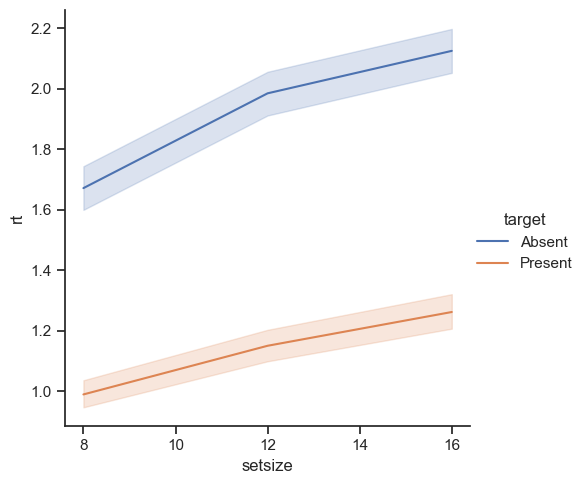

In [22]:
# let's try various plot types from seaborn
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.relplot(x="setsize", y="rt", hue="target", kind = 'line', data=dat);


You can split the figures with `col` and `row` parameters. For example:

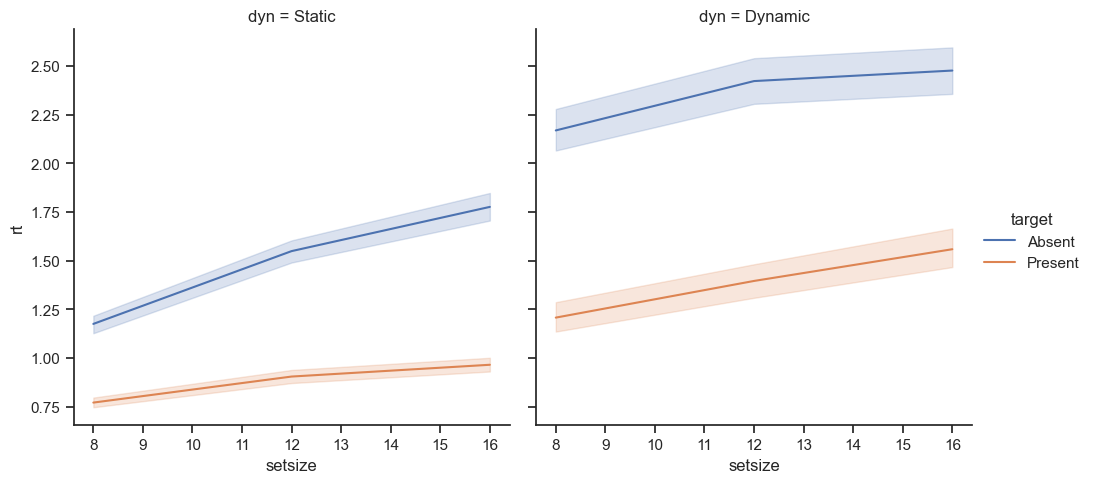

In [23]:
sns.relplot(x="setsize", y="rt", hue="target", kind = 'line', col='dyn', data=dat);

`displot()` is a figure-level interface for drawing distribution plots onto a FacetGrid. The key parameter is `kind`, which can be `hist`, `kde`, `ecdf`, `rug`. Here is an example:

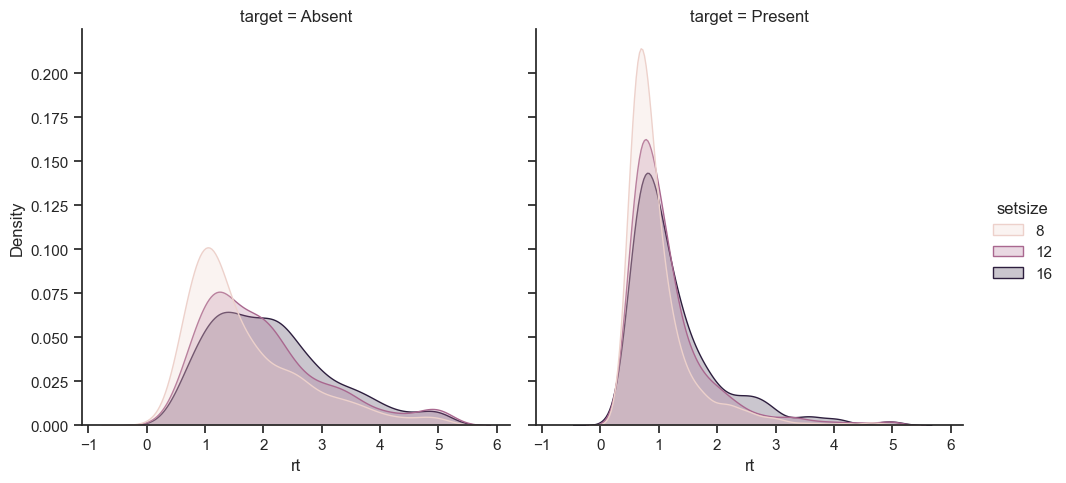

In [26]:
# show the distribution of RTs, separately for each setsize
sns.displot(data=dat, x="rt", hue="setsize", col="target", kind="kde", fill=True);

`catplot()` is the third type of plot. It is a figure-level interface for drawing categorical plots onto a FacetGrid. The key parameter is `kind`, which can be `strip`, `swarm`, `box`, `violin`, `boxen`, `point`, `bar`, `count`. Here is an example:

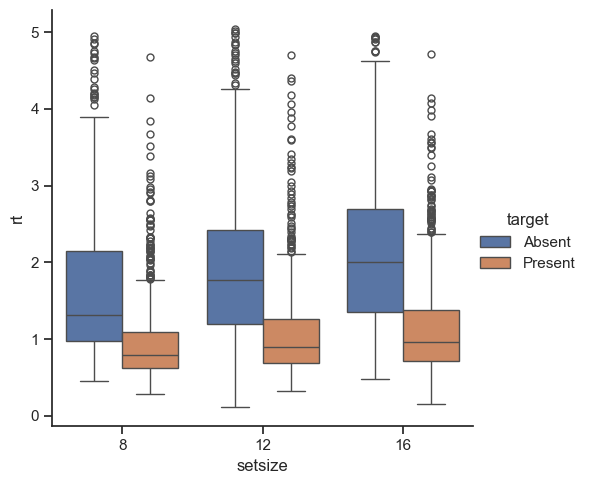

In [28]:
# plot the boxplot of RTs, separately for each setsize, coloumn is target
sns.catplot(x="setsize", y="rt", hue="target", kind="box", data=dat.query('correct == 1'))

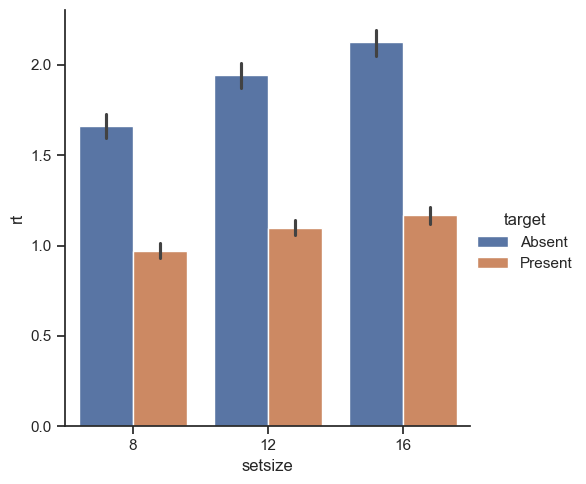

In [29]:
# your task, please change the above plot to bar plot


## Assignment


### The Iris extended dataset

Iris dataset is a famous dataset for machine learning. It is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

However, for the assigned task, we will used the extended dataset, which originates from [kaggle here](https://www.kaggle.com/datasets/samybaladram/iris-dataset-extended/data) This enriched version introduces additional, realistic features, thus expanding the dataset to 1200 rows. These new attributes offer a more nuanced understanding of iris flower biology and ecology. 


#### Columns

##### Basic Attributes

![Iris Anatomy](https://zahidhasan.github.io/images/iris.png)
-   **Species**: Species of the iris flower (Setosa, Versicolor, Virginica)

##### Environmental Factors

-   **Elevation**: Elevation level where the iris was found (in meters)
-   **Soil Type**: Type of soil where the iris was found (Loamy, Sandy, Clayey)

##### Basic Morphological Features
-   **Sepal Length (cm)**: Length of the sepal in centimeters
-   **Sepal Width (cm)**: Width of the sepal in centimeters
-   **Petal Length (cm)**: Length of the petal in centimeters
-   **Petal Width (cm)**: Width of the petal in centimeters

##### Derived Morphological Features

-   **Sepal Area (cm^2)**: Area of the sepal calculated as Sepal Length × Sepal Width
-   **Petal Area (cm^2)**: Area of the petal calculated as Petal Length × Petal Width
-   **Sepal Aspect Ratio**: Ratio of Sepal Length to Sepal Width
-   **Petal Aspect Ratio**: Ratio of Petal Length to Petal Width
-   **Sepal-to-Petal Length Ratio**: Ratio of Sepal Length to Petal Length
-   **Sepal-to-Petal Width Ratio**: Ratio of Sepal Width to Petal Width
-   **Sepal-Petal Length Difference**: Difference between Sepal Length and Petal Length
-   **Sepal-Petal Width Difference**: Difference between Sepal Width and Petal Width

##### Advanced Morphological Features

-   **Petal Curvature (mm)**: Measure of petal curvature in millimeters
-   **Petal Texture (trichomes/mm^2)**: Number of trichomes per square millimeter on the petal
-   **Leaf Area (cm^2)**: Area of a typical leaf of the iris plant in square centimeters

##### Additional Derived Features

-   **Sepal Area Sqrt**: Square root of the Sepal Area
-   **Petal Area Sqrt**: Square root of the Petal Area
-   **Area Ratios**: Custom attribute that captures various area ratios in the dataset

#### What Sets This Dataset Apart?

##### Enhanced Biological Features

The inclusion of attributes like 'Elevation', 'Soil Type', 'Petal Curvature', and 'Petal Texture' brings in environmental and morphological aspects that are essential for a comprehensive understanding of iris flower biology.

## The dataset and EDA

In [30]:
# load the dataset (please change the path if needed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
iris_extended = pd.read_csv('iris_extended.csv')

# Display the first few rows of the dataset
iris_extended.head()


,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


Next, let's do some basic visualizations:

1. Histograms for numeric features like sepal_length, petal_length, elevation, etc., to understand their distribution.
2. A scatter plot for a pair of features (for example, sepal_length vs. petal_length) to visualize the relationship between them.

These visualizations will help students get a better sense of the data before diving into more complex analysis. 

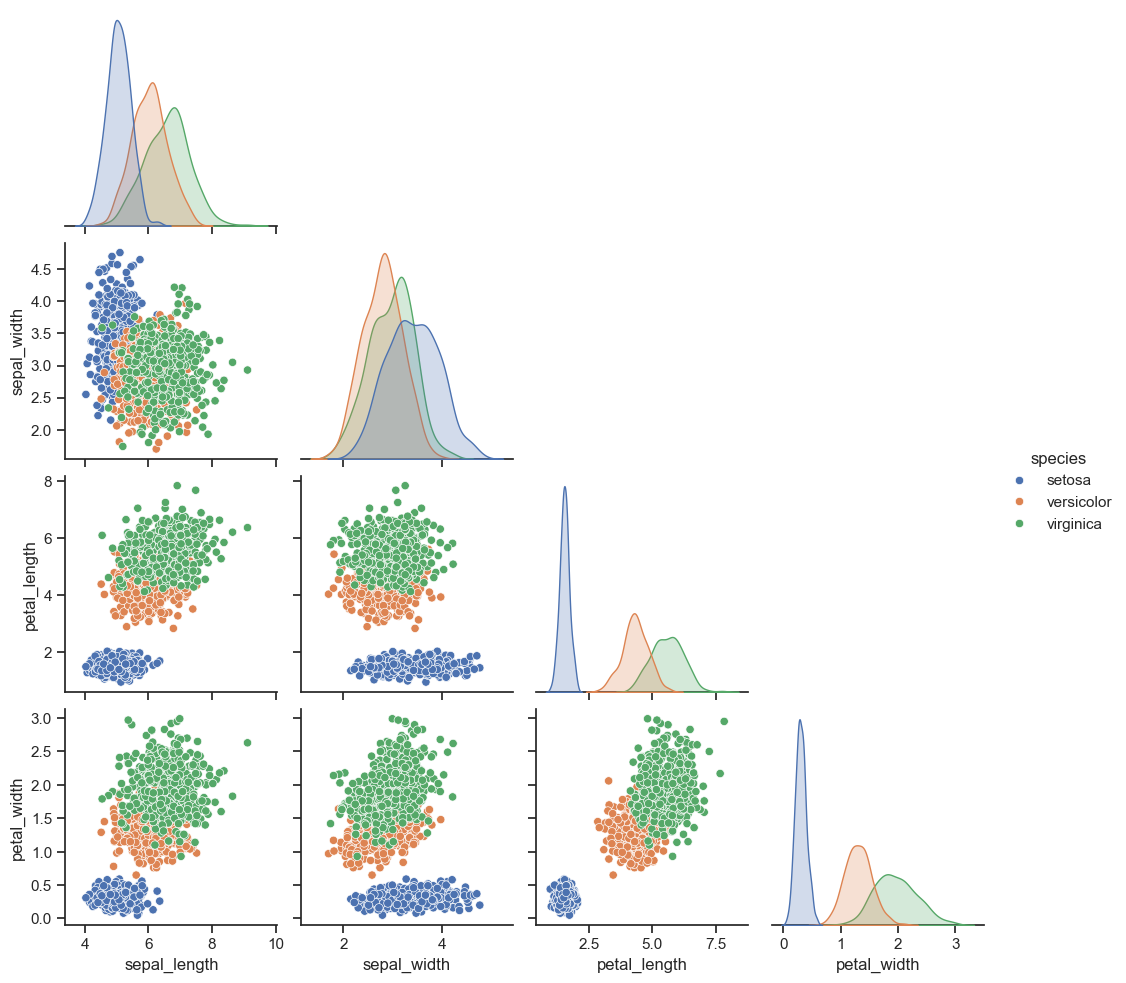

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of numeric columns for visualization
selected_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'soil_type','species']

# plotting the pairplot, separated by species
sns.pairplot(iris_extended[selected_columns], hue='species', height=2.5, corner = True)


We can also use `kde` to visualize the distribution of the data.

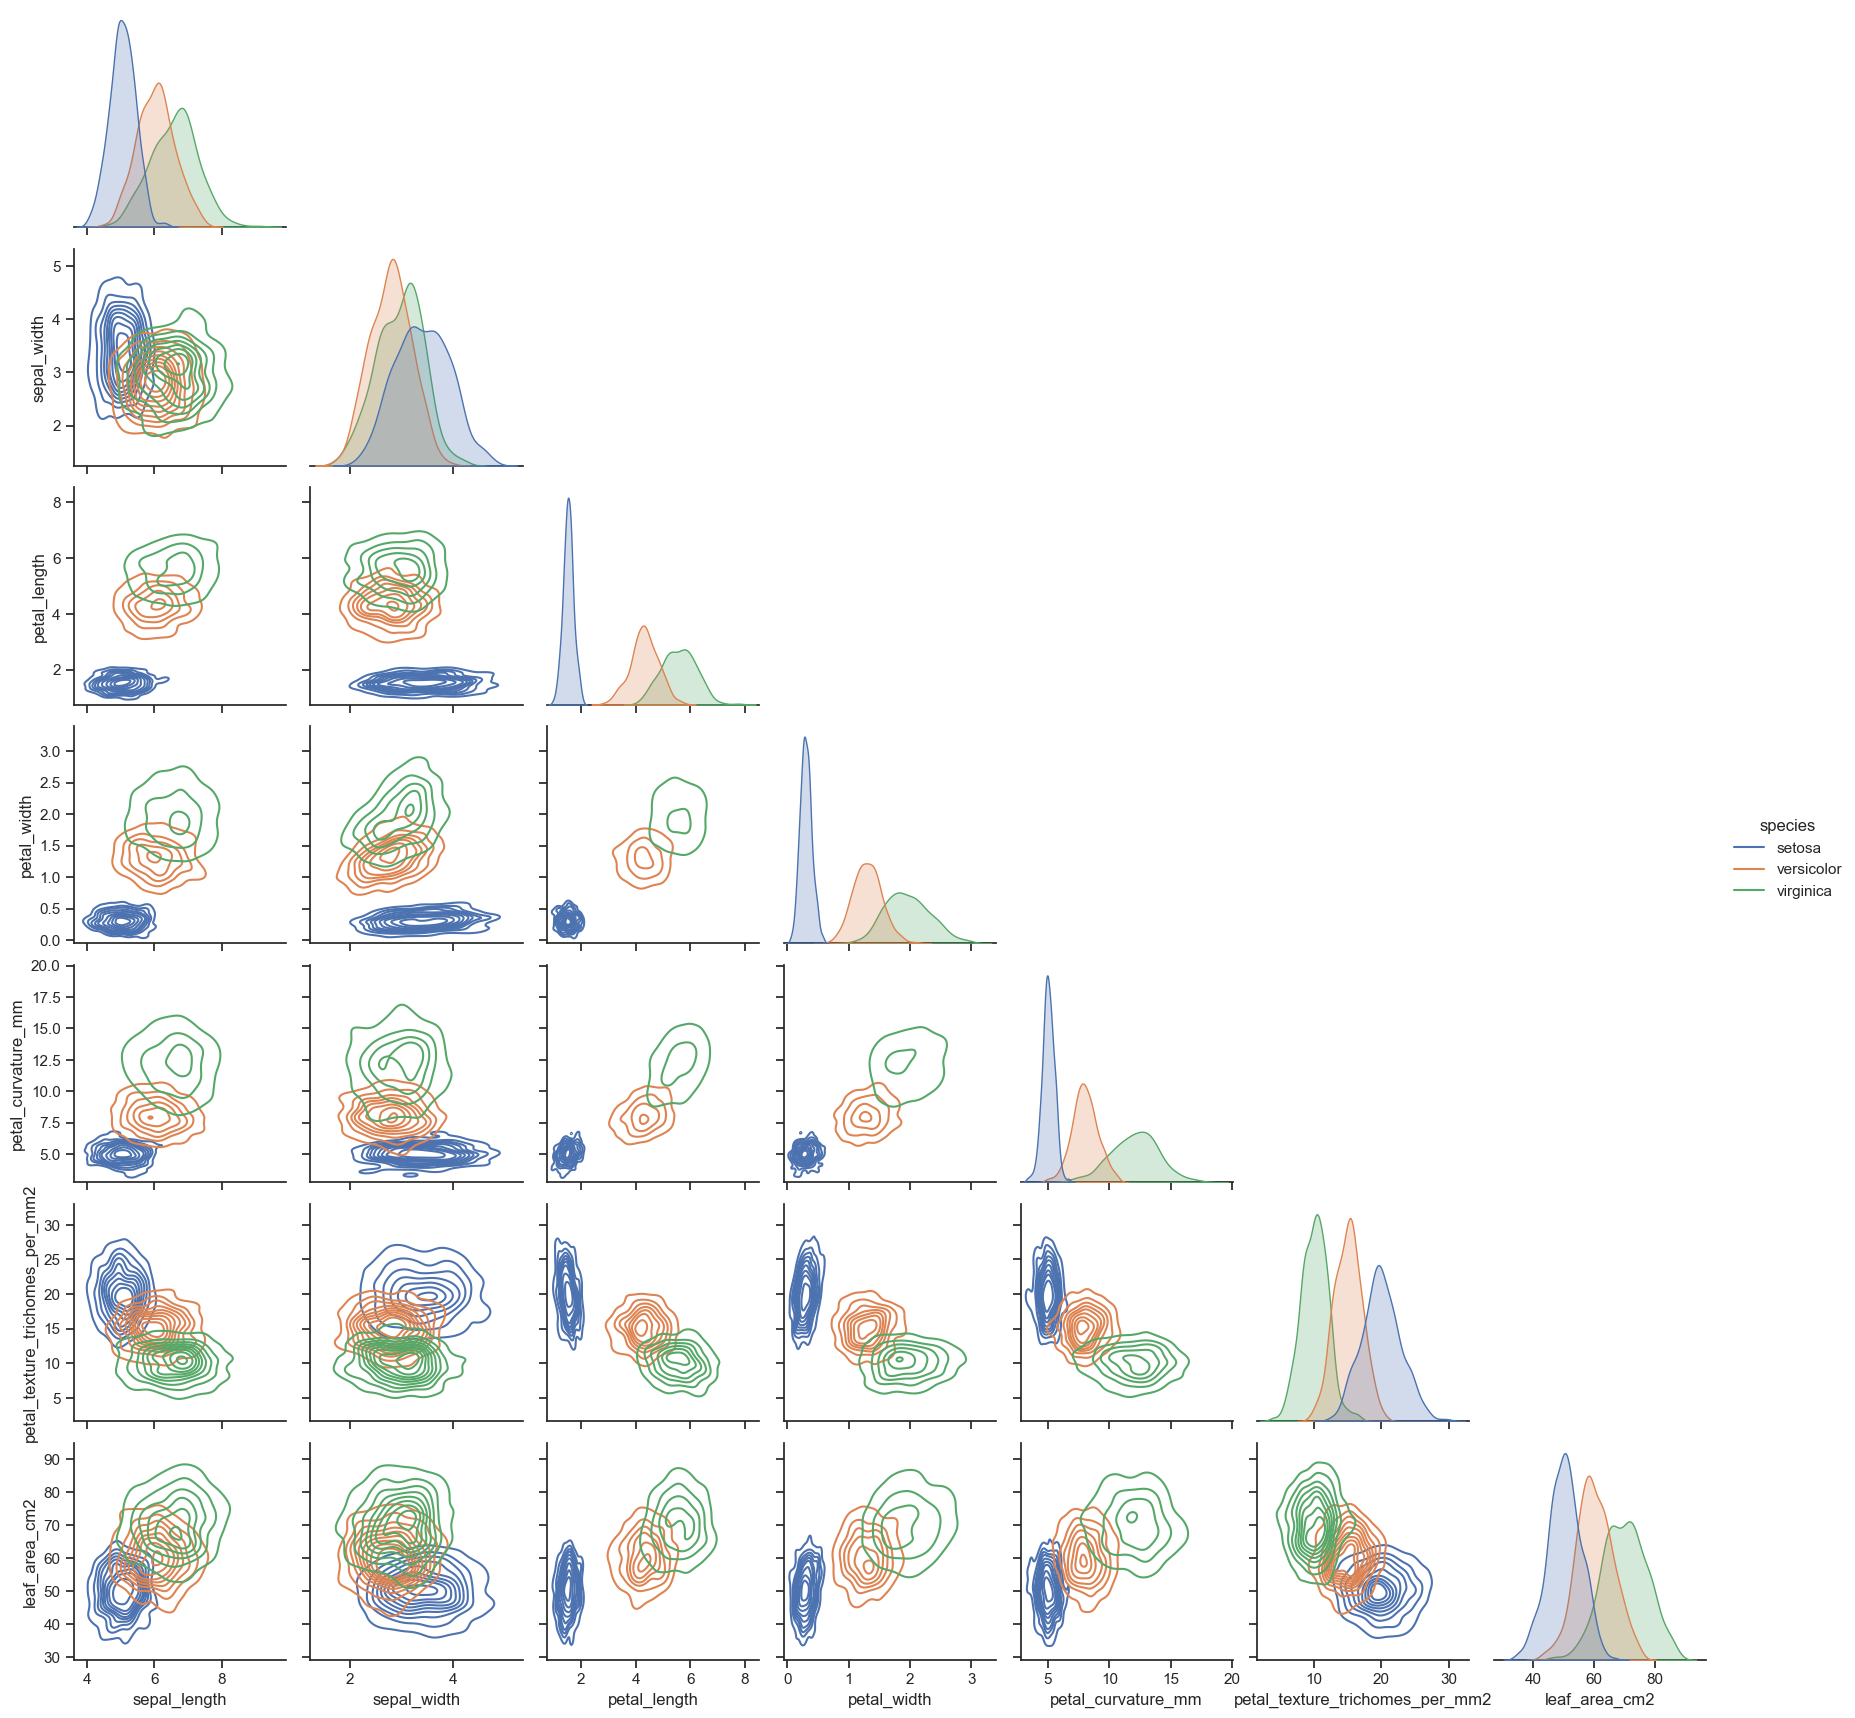

In [35]:
selected_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 
                       'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'species']

# Create the pairplot with regplots
sns.pairplot(iris_extended[selected_columns], hue='species', corner=True, kind='kde')

plt.show()

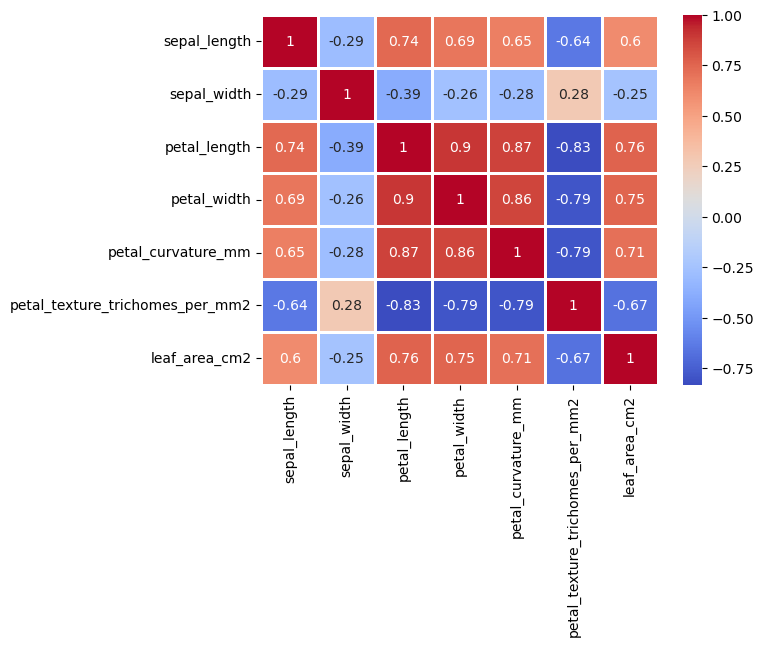

In [5]:
selected_columns = ['sepal_length','sepal_width','petal_length', 'petal_width','petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2']

correlation_matrix = iris_extended[selected_columns].corr().round(2)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=1)
plt.show()

## Multinomial Logistic Regression

Let's recall the logistic regression model:

$$ \log \frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_k x_k $$

where $p$ is the probability of the positive class.

As you can see from the above equation, the logistic regression model is a linear model for the log-odds for the binary class. 

Now, what if we have more than two classes? We have three types of iris flowers, so we have three classes: Setosa, Versicolor, and Virginica. This is where multinomial logistic regression comes in. It's an extension of logistic regression that adds native support for multi-class classification problems.

### How multinomial logistic regression works

1. The Outcome Variable: Instead of just two categories, your outcome variable has three or more categories that are not ordered.
2. The Predictor Variables: These can be continuous (interval/ratio) or categorical (ordinal/nominal).
3. The Model: The model estimates a separate binary logistic regression equation for each of the k categories vs. the reference category. The reference category is the category with the highest prevalence. For example, if you have three categories, the reference category would be the one with the highest proportion of cases. The model then compares each of the other categories to the reference category. By doing these comparisons, the model can estimate the probability of each category.
4. Interpretation: The interpretation of the coefficients is similar to that of binary logistic regression. The coefficients represent the change in the log odds of the outcome for a one unit increase in the predictor variable. The exponentiated coefficients (odds ratios) represent the change in odds of the outcome for a one unit increase in the predictor variable.

### Multinomial logistic regression in Python with scikit-learn

We can use `LogisticRegression` from `sklearn.linear_model` to do multinomial logistic regression. The key parameter is `multi_class`, which can be `ovr` (one-vs-rest) or `multinomial`. The default is `ovr`. 

We can also use `train_test_split` from `sklearn.model_selection` to split the data into training and testing sets. The key parameter is `test_size`, which is the proportion of the dataset to include in the test split. The default is 0.25.

As we have used in our previous sessions, we can use `sklearn.metrics` to calculate the accuracy score and confusion matrix, and classification report.


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [38]:
# Here is a simple example of multinomial logistic regression
# Note: Your task is to use iris_extended dataset to predict species from the other variables
# here the example we use the stanadard iris dataset
iris = datasets.load_iris()
df= pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

#splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

# create logistic regression model and fit the data
logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logmodel.fit(X_train,y_train)


LogisticRegression(multi_class='multinomial')

In [39]:
# make predictions on the test set
y_pred = logmodel.predict(X_test)

# evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[15  0  0]
 [ 0 14  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



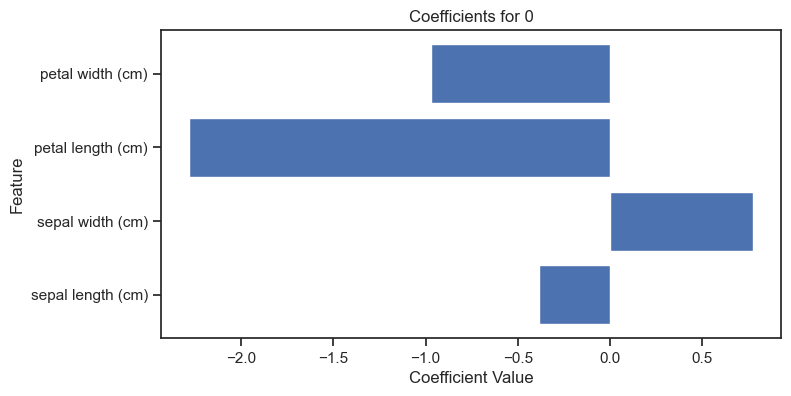

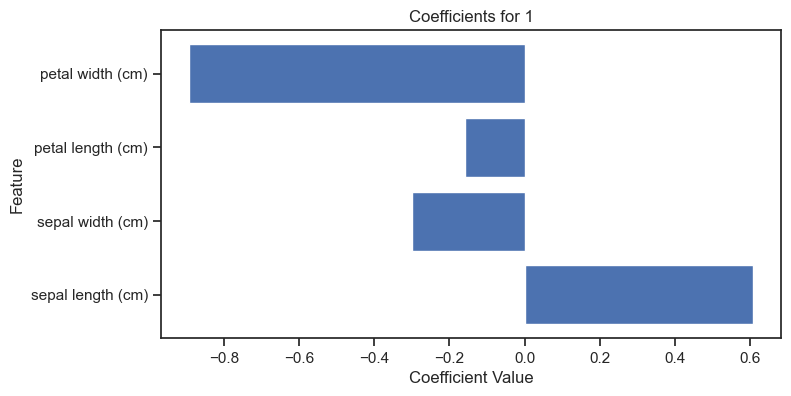

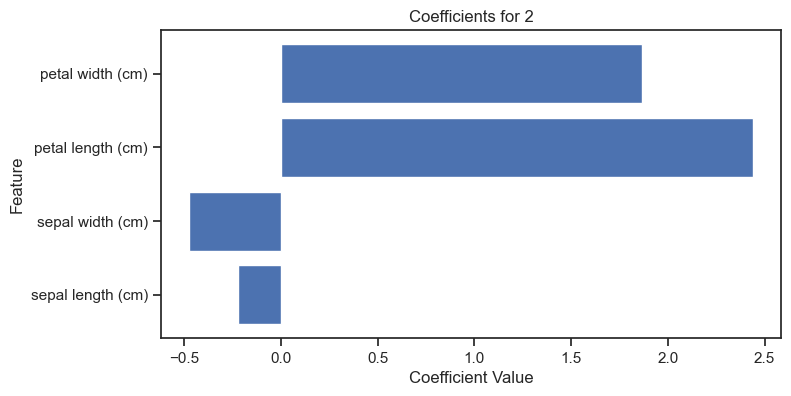

In [44]:
coefficients = logmodel.coef_
features = X_train.columns  # replace with your feature names

# Plotting
for i, category in enumerate(logmodel.classes_):
    plt.figure(figsize=(8, 4))
    coef = coefficients[i]
    plt.barh(features, coef)
    plt.title(f'Coefficients for {category}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

Visualization of the multinomial logistic regression model is not like the binary logistic regression model. But if we limited features to two, we can use `DicisionBoundaryDisplay` to visualize two features and the decision boundary.


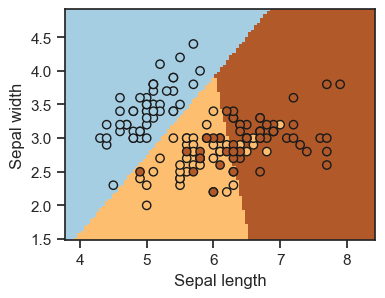

In [48]:
from sklearn.inspection import DecisionBoundaryDisplay
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


### Neural Network with Keras

A simple neural network with one hidden layer can be used to do the classification. We can use `keras` to build the neural network. The key parameters are `input_dim`, which is the number of input features, `units`, which is the number of neurons in the hidden layer, and `activation`, which is the activation function. The default is `relu`.


In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = iris.data
yc = iris.target.reshape(-1,1)

# we then use the OneHotEncoder to encode the target variable. 
# It will transform categorical variable into dummy/indicator variables.
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(yc)
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [55]:

# build model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu', name='Level1'))
model.add(Dense(10, activation='relu', name='Level2'))
model.add(Dense(3, activation='softmax',name = 'Output'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Level1 (Dense)              (None, 10)                50        
                                                                 
 Level2 (Dense)              (None, 10)                110       
                                                                 
 Output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# train the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)
# evaluate the model
scores = model.evaluate(X_test, y_test)

Epoch 1/100


TypeError: in user code:

    File "/Users/strongway/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/Users/strongway/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/strongway/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/Users/strongway/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/strongway/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/Users/strongway/miniconda3/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/strongway/miniconda3/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/strongway/miniconda3/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/strongway/miniconda3/lib/python3.11/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/strongway/miniconda3/lib/python3.11/site-packages/keras/src/backend.py", line 5571, in categorical_crossentropy
        target = tf.convert_to_tensor(target)

    TypeError: Failed to convert elements of SparseTensor(indices=Tensor("DeserializeSparse:0", shape=(None, 2), dtype=int64), values=Tensor("DeserializeSparse:1", shape=(None,), dtype=float32), dense_shape=Tensor("stack:0", shape=(2,), dtype=int64)) to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.


# Train the model


## Task 1: Multinomial Logistic Regression

1. Read the dataset `iris_extended.csv` into a pandas dataframe.
2. Do some basic EDA, such as histograms and scatter plots.
3. Split the data into training and testing sets.
4. Fit a multinomial logistic regression model with `multi_class='multinomial'` and `solver='lbfgs'`.
5. Calculate the accuracy score and confusion matrix, and classification report.
6. Interpret the coefficients of the model and your results


In [ ]:
# Your code here


## Task 2: Neural Network with Keras

1. The first several steps are the same as Task 1.
2. Create a neural network model with Keras.
3. Compile the model with `loss='categorical_crossentropy'` and `optimizer='adam'`.
4. Fit the model with `epochs=##` and `batch_size=##`. (You can adjust the parameters to get a better result.)
5. Calculate the accuracy score and confusion matrix, and classification report.
6. Interpret the coefficients of the model and your results



In [ ]:
# Your code is here